In [ ]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
# Set of 70,000 images of numbers, each of 28x28 pixels = 784 features

In [ ]:
X = mnist.data
y = mnist.target

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

SVMs do not scale well to large datasets, so let's only train on the first 2,000 instances, or else this section will take a very long time to run:

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [ ]:
some_digit = X[0]
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [ ]:
# It selected the OvO strategy. The decision_function shows the number of worn duels against other numbers
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [ ]:
# One can enforce an OvR strategy
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [ ]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

Multioutput Classification

In [ ]:
import numpy as np
np.random.seed(42)  # to make this code example reproducible
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

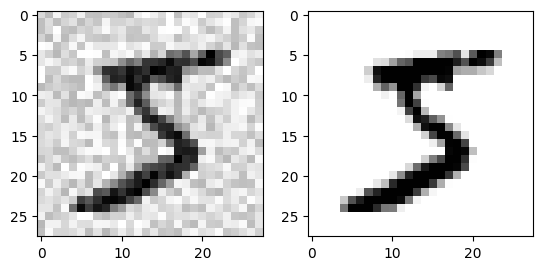

In [ ]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")

plt.subplot(121); plot_digit(X_train_mod[0])
plt.subplot(122); plot_digit(y_train_mod[0])
plt.show()

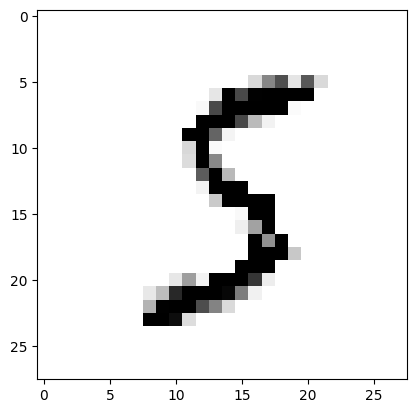

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_train_mod[0]])
plot_digit(clean_digit)
plt.show()

In [ ]:
import numpy as np
from numpy import random
random.rand()

0.64131175551817